In [1]:
# import required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# creating pandas dataframe
original_dataframe=pd.read_csv("IMDB-Movie-Data.csv")

In [3]:
# converting all column names into lower case
original_dataframe.columns=[col.lower() for col in original_dataframe]

In [4]:
# getting names of columns
original_dataframe.columns

Index(['rank', 'title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime (minutes)', 'rating', 'votes', 'revenue (millions)',
       'metascore'],
      dtype='object')

In [5]:
# observing null values and datatypes of data in dataframe
original_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                1000 non-null   int64  
 1   title               1000 non-null   object 
 2   genre               1000 non-null   object 
 3   description         1000 non-null   object 
 4   director            1000 non-null   object 
 5   actors              1000 non-null   object 
 6   year                1000 non-null   int64  
 7   runtime (minutes)   1000 non-null   int64  
 8   rating              1000 non-null   float64
 9   votes               1000 non-null   int64  
 10  revenue (millions)  872 non-null    float64
 11  metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
# grouping data according to genre and taking revenue (millions) mean
genre_group_revenue=original_dataframe.groupby("genre",as_index=False)["revenue (millions)"].mean()

In [7]:
# names of attributes in group 
# this group is dataframe
genre_group_revenue.columns

Index(['genre', 'revenue (millions)'], dtype='object')

In [8]:
# checking mean value i.e revenue (millions) column, we got from above code
genre_group_revenue["revenue (millions)"]

0      131.560000
1      223.740000
2       16.500000
3       95.733571
4       90.620000
          ...    
202     62.450000
203     20.760000
204     64.510000
205      0.320000
206           NaN
Name: revenue (millions), Length: 207, dtype: float64

In [9]:
# checking dataframe
genre_group_revenue

,genre,revenue (millions)
0,Action,131.560000
1,"Action,Adventure",223.740000
2,"Action,Adventure,Biography",16.500000
3,"Action,Adventure,Comedy",95.733571
4,"Action,Adventure,Crime",90.620000
...,...,...
202,"Romance,Sci-Fi,Thriller",62.450000
203,Sci-Fi,20.760000
204,"Sci-Fi,Thriller",64.510000
205,Thriller,0.320000


In [10]:
# it gives null value count in each column
genre_group_revenue.isnull().sum()

genre                  0
revenue (millions)    12
dtype: int64

In [11]:
# this gives genre name and its corresonding mean value
# we can observe some mean have nan value
for i in genre_group_revenue.index:
    print(genre_group_revenue["genre"][i],genre_group_revenue["revenue (millions)"][i])

Action 131.56
Action,Adventure 223.73999999999998
Action,Adventure,Biography 16.5
Action,Adventure,Comedy 95.73357142857141
Action,Adventure,Crime 90.62
Action,Adventure,Drama 77.32166666666666
Action,Adventure,Family 112.86666666666666
Action,Adventure,Fantasy 201.85730769230776
Action,Adventure,Horror 131.24
Action,Adventure,Mystery 150.344
Action,Adventure,Romance 23.47
Action,Adventure,Sci-Fi 209.23020000000005
Action,Adventure,Thriller 158.12363636363636
Action,Adventure,Western 91.33500000000001
Action,Biography,Crime 0.1
Action,Biography,Drama 100.65285714285713
Action,Comedy 58.79
Action,Comedy,Crime 92.41083333333334
Action,Comedy,Drama 2.87
Action,Comedy,Family 78.75
Action,Comedy,Fantasy 55.873333333333335
Action,Comedy,Horror 3.64
Action,Comedy,Mystery 23.62
Action,Comedy,Romance 27.395
Action,Comedy,Sci-Fi 26.0
Action,Comedy,Sport 148.21
Action,Crime,Drama 84.13125000000001
Action,Crime,Fantasy 134.57
Action,Crime,Mystery 67.37
Action,Crime,Sci-Fi 58.61
Action,Crime,Sport 

In [12]:
# calculating mean value of revenue (millions)
mean_revenue_value=genre_group_revenue["revenue (millions)"].mean()

In [13]:
# mean value
mean_revenue_value

66.02433967963796

In [14]:
# replacing nan values with mean value of revenue (millions)
genre_group_revenue["revenue (millions)"].fillna(mean_revenue_value,inplace=True)

In [15]:
# now we can observe there are no nan values in revenue (millions)
genre_group_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   genre               207 non-null    object 
 1   revenue (millions)  207 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.9+ KB


In [16]:
# I have to create dictionary with genre and revenue value without any null value
# created dictionary which has genre name as key and its corresponding mean revenue (millions) as 
# its value 
data_dict={}
for i in genre_group_revenue.index:
    data_dict[genre_group_revenue["genre"][i]]=genre_group_revenue["revenue (millions)"][i]
#print(data_dict)

In [17]:
# it traverse on every row
# observe here we are doing changes in original dataframe 
for i in original_dataframe.index:
    # if revenue value is null then replace it with mean value of its corresponding genre
    if pd.isnull(original_dataframe["revenue (millions)"][i]):
        original_dataframe["revenue (millions)"][i]=data_dict[original_dataframe["genre"][i]] 
        #print(original_dataframe["genre"][i],data_dict[original_dataframe["genre"][i]])

c:\users\tejaswita\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# now we can see that we dont have null values in revenue column
# in original dataframe
original_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                1000 non-null   int64  
 1   title               1000 non-null   object 
 2   genre               1000 non-null   object 
 3   description         1000 non-null   object 
 4   director            1000 non-null   object 
 5   actors              1000 non-null   object 
 6   year                1000 non-null   int64  
 7   runtime (minutes)   1000 non-null   int64  
 8   rating              1000 non-null   float64
 9   votes               1000 non-null   int64  
 10  revenue (millions)  1000 non-null   float64
 11  metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


##### Replacing nan value in metascore column

In [19]:
# splitting dataset into groups
genre_group_metascore=original_dataframe.groupby("genre",as_index=False)["metascore"].mean()
print(genre_group_metascore)
print(type(genre_group_metascore))
# we got 207 rows ,as we have 207 genre
# without as_index=False, it returns a Series instead

                          genre  metascore
0                        Action  37.000000
1              Action,Adventure  57.333333
2    Action,Adventure,Biography  62.500000
3       Action,Adventure,Comedy  47.214286
4        Action,Adventure,Crime  48.333333
..                          ...        ...
202     Romance,Sci-Fi,Thriller        NaN
203                      Sci-Fi  53.000000
204             Sci-Fi,Thriller  34.000000
205                    Thriller  59.714286
206                Thriller,War  40.000000

[207 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [20]:
# observing dataframe after groupby , we got
genre_group_metascore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   genre      207 non-null    object 
 1   metascore  200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [21]:
# calculating mean of metascore
mean_value=genre_group_metascore["metascore"].mean()

In [22]:
# mean value
mean_value

58.624719921182134

In [23]:
# filling nan values of metascore column with metascore mean value
genre_group_metascore["metascore"].fillna(mean_value,inplace=True)

In [24]:
# now we can see there is no nan value in metascore column
genre_group_metascore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   genre      207 non-null    object 
 1   metascore  207 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [25]:
# I have dictionary with genre and metascore value without any null value
metascore_data_dict={}
for i in genre_group_metascore.index:
    metascore_data_dict[genre_group_metascore["genre"][i]]=genre_group_metascore["metascore"][i]
#print(metascore_data_dict)

In [26]:
# we need to replace nan values in original_dataframe
# it traverse on every row
# it replaces nan values in original dataframe with mean of metascore corresponding to its genre
for i in original_dataframe.index:
    if pd.isnull(original_dataframe["metascore"][i]):
        original_dataframe["metascore"][i]=metascore_data_dict[original_dataframe["genre"][i]] 

c:\users\tejaswita\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# if we observe original dataframe info
# there are no null values in metascore column
original_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                1000 non-null   int64  
 1   title               1000 non-null   object 
 2   genre               1000 non-null   object 
 3   description         1000 non-null   object 
 4   director            1000 non-null   object 
 5   actors              1000 non-null   object 
 6   year                1000 non-null   int64  
 7   runtime (minutes)   1000 non-null   int64  
 8   rating              1000 non-null   float64
 9   votes               1000 non-null   int64  
 10  revenue (millions)  1000 non-null   float64
 11  metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [28]:
# getting counts of movies each year
original_dataframe["year"].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: year, dtype: int64

In [29]:
# getting data for slot_one 
# from 2006 to 2010
#year_slot_one=original_dataframe[(original_dataframe["year"]) >= 2006 & (original_dataframe["year"]) <=2010]
year_slot_one=original_dataframe[(original_dataframe["year"] >= 2006) & (original_dataframe["year"] <=2010)]

In [30]:
# observe the dataframe we got
year_slot_one

,rank,title,genre,description,director,actors,year,runtime (minutes),rating,votes,revenue (millions),metascore
39,40,5- 25- 77,"Comedy,Drama","Alienated, hopeful-filmmaker Pat Johnson's epi...",Patrick Read Johnson,"John Francis Daley, Austin Pendleton, Colleen ...",2007,113,7.1,241,33.035,64.28
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.320,82.00
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.080,66.00
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy","Captain Barbossa, Will Turner and Elizabeth Sw...",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.1,498821,309.400,50.00
77,78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.520,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.800,44.00
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.200,42.00
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.130,37.00
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540,46.00


In [31]:
# it is dataframe
type(year_slot_one)

pandas.core.frame.DataFrame

In [32]:
# getting total count of movies in above slot one dataframe
year_slot_one["year"].count()

260

In [33]:
# gettint rating value
rating_array=year_slot_one["rating"].unique()
# sorting rating in ascending order
rating_array_sorted=sorted(rating_array)
#rating_array_sorted

In [34]:
# getting each year number of movies count
year_slot_one["year"].value_counts()

2010    60
2007    53
2008    52
2009    51
2006    44
Name: year, dtype: int64

In [35]:
# getting year slot from 2011 to 2016
year_slot_two=original_dataframe[(original_dataframe["year"] >= 2011) & (original_dataframe["year"] <=2016)]

In [36]:
# total number of movies we got in 2011 to 2016
year_slot_two["year"].count()

740

In [37]:
# getting each year movie count
year_slot_two["year"].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
Name: year, dtype: int64

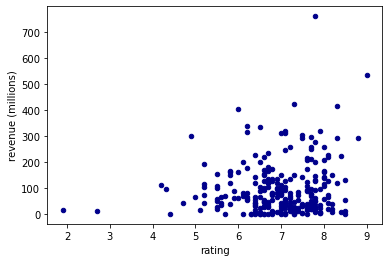

In [38]:
year_slot_one_scatter=year_slot_one.plot.scatter(x="rating",y="revenue (millions)",c="DarkBlue")
#plt.scatter(x="rating",y=year_slot_one["revenue (millions)"],c="DarkBlue")

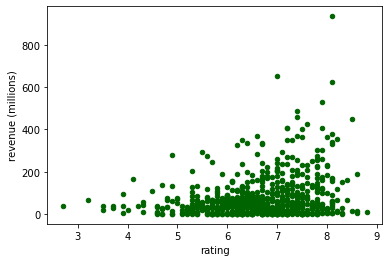

In [39]:
year_slot_two_scatter=year_slot_two.plot.scatter(x="rating",y="revenue (millions)",c="DarkGreen")